# Done by Jeremy

### Quick look at Serena's Data

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf

**Load Data**

In [22]:
df = pd.read_csv("../../data/Participant_ID_C/User3.csv")

In [23]:
df.head()

,Start,Finish,Steps (count)
0,28-Nov-2015 12:00,28-Nov-2015 13:00,13.0
1,28-Nov-2015 13:00,28-Nov-2015 14:00,19.0
2,28-Nov-2015 14:00,28-Nov-2015 15:00,33.0
3,28-Nov-2015 15:00,28-Nov-2015 16:00,80.0
4,28-Nov-2015 16:00,28-Nov-2015 17:00,0.0


It appears the data has 3 columns to indicate the starting and ending time of the exercise and the number of steps taken

### Quick Look at the statistical information of this dataset

In [24]:
df.describe()

,Steps (count)
count,42794.000000
mean,194.966888
std,509.177017
min,0.000000
25%,0.000000
50%,0.000000
75%,90.000000
max,6223.347475


As the data was not previously in the appropriate date time format, the following code will convert columns **Start** and **Finish** to datetime data type

In [25]:
format = '%d-%b-%Y %H:%M'
df['Start'] = pd.to_datetime(df['Start'],format=format)
df['Finish'] = pd.to_datetime(df['Finish'],format=format)

In [26]:
df.dtypes

Start            datetime64[ns]
Finish           datetime64[ns]
Steps (count)           float64
dtype: object

Conversion was successful

Computing the number of steps by day. Here, I aggregated it by using the start column (Assuming this is the creation date) and sum values.

In [27]:
step_counts_by_creation = df.groupby('Start').sum()
step_counts_by_creation.head()

,Steps (count)
Start,
2015-11-28 12:00:00,13.0
2015-11-28 13:00:00,19.0
2015-11-28 14:00:00,33.0
2015-11-28 15:00:00,80.0
2015-11-28 16:00:00,0.0


This results in the Start column being selected as the index and the timestamp and step count are summed as above.

Counts by day are obtained by using the resampling method with *D* as the parameter

In [28]:
day = step_counts_by_creation['Steps (count)'].resample('D').sum()
day.head()

Start
2015-11-28     145.0
2015-11-29    4233.0
2015-11-30    4162.0
2015-12-01    3209.0
2015-12-02    2773.0
Freq: D, Name: Steps (count), dtype: float64

#### We can observe the top 10 most walked days by Serena

In [29]:
day.sort_values(ascending=False)[:10]

Start
2020-10-04    20913.000000
2020-10-09    20769.000000
2017-12-16    20617.000000
2019-12-10    19910.000000
2020-01-12    19635.000000
2019-07-19    19478.000000
2019-12-15    18907.000000
2019-12-21    17989.783888
2018-09-23    17881.000000
2019-12-04    17604.000000
Name: Steps (count), dtype: float64

#### We can observe the top 10 most walked Months by Serena

In [30]:
dist_month_mean = day.resample('M').mean()
dist_month_mean.sort_values(ascending=False)[:10]

Start
2019-12-31    10248.612903
2020-01-31     8134.774194
2019-03-31     7338.806452
2020-10-31     7102.200000
2019-02-28     6950.500000
2019-01-31     6940.354839
2019-10-31     6726.903226
2019-05-31     6711.838710
2019-07-31     6560.870968
2019-08-31     6401.903226
Name: Steps (count), dtype: float64

**Tester**

In [31]:
#Display all step count of a specific month and year
day[(day.index.year == 2019) & (day.index.month == 12)]

Start
2019-12-01    12375.000000
2019-12-02    10793.000000
2019-12-03    14456.000000
2019-12-04    17604.000000
2019-12-05     7654.000000
2019-12-06    11732.000000
2019-12-07     5468.686210
2019-12-08    16805.313790
2019-12-09    11341.000000
2019-12-10    19910.000000
2019-12-11    13001.000000
2019-12-12     1702.000000
2019-12-13     8749.005972
2019-12-14    14187.994028
2019-12-15    18907.000000
2019-12-16    14247.180131
2019-12-17     8005.819869
2019-12-18    12138.000000
2019-12-19    16366.000000
2019-12-20     4947.000000
2019-12-21    17989.783888
2019-12-22     4003.216112
2019-12-23    11118.000000
2019-12-24     6551.000000
2019-12-25      677.000000
2019-12-26    15134.000000
2019-12-27    13017.000000
2019-12-28     4634.000000
2019-12-29     2309.000000
2019-12-30      192.000000
2019-12-31     1692.000000
Freq: D, Name: Steps (count), dtype: float64

#### Exploration of average steps observed by months

In [32]:
month_mean = dist_month_mean.groupby(dist_month_mean.index.month).mean()
month_mean.index = list(calendar.month_name)[1:]

<AxesSubplot:>

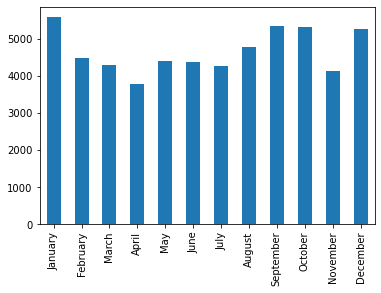

In [33]:
month_mean.plot(kind='bar')

Serena's Most walked month averagely is **January** with **September, October** and **December** closely following behind

#### Exploration of average steps observed by day

In [34]:
weekday_mean = day.groupby(day.index.dayofweek).mean()
weekday_mean.index = ['Monday', 'Tuesday',
                          'Wednesday', 'Thursday',
                          'Friday', 'Saturday',
                          'Sunday']

<AxesSubplot:>

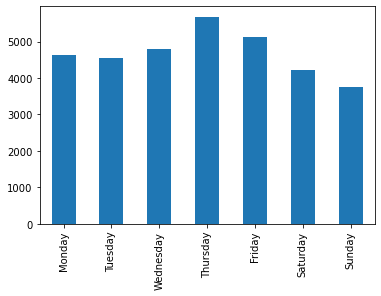

In [35]:
weekday_mean.plot(kind='bar')

Serena's most walked day is **Thursday** followed by **Friday**

# Data Visualisation

Creating a new dataframe with the **Start** column being the index 

In [36]:
steps = pd.read_csv("../../data/Participant_ID_C/User3.csv", parse_dates=["Start"], index_col="Start")
steps = steps.rename(columns = {'Steps (count)': 'Steps'}, inplace = False)

In [37]:
steps_taken = steps.drop(['Finish'], axis=1)

### Visualising how many steps taken over the entire dataset

Text(0.5, 0, 'Date')

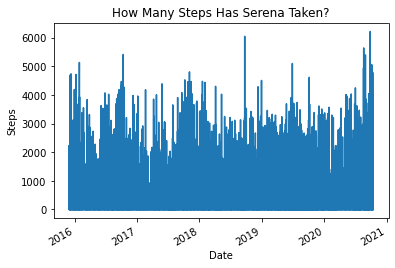

In [38]:
steps_taken.plot(legend=None)
plt.title('How Many Steps Has Serena Taken?')
plt.ylabel('Steps')
plt.xlabel('Date')

We can observe that her step count over the years is reletively similar (observing lesser step count over certain months). With a few very high spikes observed in 2018 and 2020. 

In [39]:
steps_new = steps_taken.resample('D').sum()

Using the resample function however, we observe that the spike is in 2017, 2020.

<Figure size 864x576 with 0 Axes>

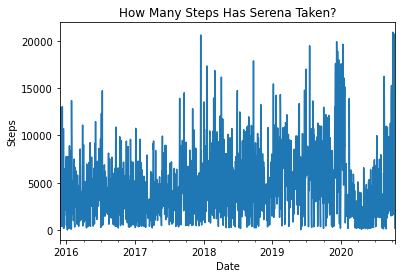

<Figure size 864x576 with 0 Axes>

In [40]:
steps_new.plot(legend=None)
plt.title('How Many Steps Has Serena Taken?')
plt.ylabel('Steps')
plt.xlabel('Date')
plt.figure(figsize=(12,8))

Question is what was Serena doing during those years that might have caused the spike? 💁🧐

#### Further look at the 2 years with the spikes

<AxesSubplot:xlabel='Start'>

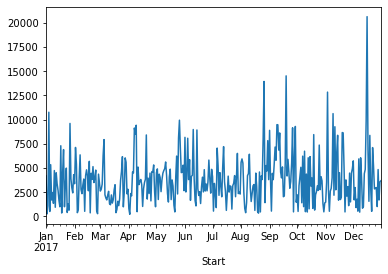

In [41]:
# In 2017
steps_new['2017']['Steps'].plot()

The spike in 2017 was in **December** so potentially she could have been on a holiday?

<AxesSubplot:xlabel='Start'>

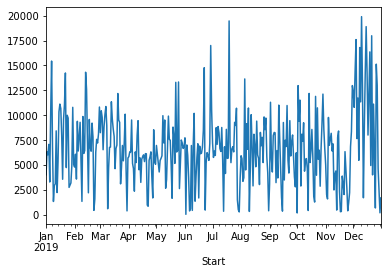

In [42]:
# In 2019
steps_new['2019']['Steps'].plot()

<AxesSubplot:xlabel='Start'>

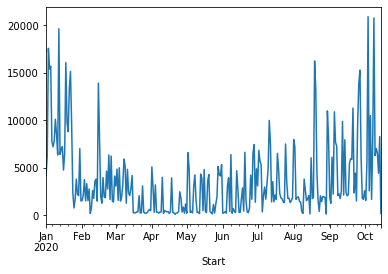

In [43]:
# In 2020
steps_new['2020']['Steps'].plot()

2020, the year of covid. The dip in step count was observed during the lockdown period and slowly started picking up over the months. She seems very active in **August** and **October** though

## Analysis

For a quick look, the code below will display a table with the Mean Steps taken from 2015-2020

In [44]:
y_2015 = steps_new['2015']['Steps'].mean()
y_2016 = steps_new['2016']['Steps'].mean()
y_2017 = steps_new['2017']['Steps'].mean()
y_2018 = steps_new['2018']['Steps'].mean()
y_2019 = steps_new['2019']['Steps'].mean()
y_2020 = steps_new['2020']['Steps'].mean()

means = pd.DataFrame({
    'Year': ['2015', '2016', '2017', '2018','2019','2020'],
    'Step Mean': [round(y_2015, 3),round(y_2016, 3), round(y_2017, 3), round(y_2018, 3), 
                  round(y_2019, 3), round(y_2020, 3)]})
means

,Year,Step Mean
0,2015,4194.265
1,2016,3851.792
2,2017,3787.405
3,2018,5282.211
4,2019,6675.441
5,2020,3612.824


There does not appear to be any clear trend in the steps taken over the years

For a better look at the highest step count and the lowest step count over the years i will be creating a table with the respective values

In [45]:
y_2015 = steps_new['2015']['Steps']
y_2016 = steps_new['2016']['Steps']
y_2017 = steps_new['2017']['Steps']
y_2018 = steps_new['2018']['Steps']
y_2019 = steps_new['2019']['Steps']
y_2020 = steps_new['2020']['Steps']
low_2015 = np.quantile(y_2015, .25)
high_2015 = np.quantile(y_2015, .75)
low_2016 = np.quantile(y_2016, .25)
high_2016 = np.quantile(y_2016, .75)
low_2017 = np.quantile(y_2017, .25)
high_2017 = np.quantile(y_2017, .75)
low_2018 = np.quantile(y_2018, .25)
high_2018 = np.quantile(y_2018, .75)
low_2019 = np.quantile(y_2019, .25)
high_2019 = np.quantile(y_2019, .75)
low_2020 = np.quantile(y_2020, .25)
high_2020 = np.quantile(y_2020, .75)



means = pd.DataFrame({
    'Year': ['2015','2016', '2017', '2018','2019','2020'],
    'Low': [round(low_2015, 3),round(low_2016, 3), round(low_2017, 3), round(low_2018, 3), 
                  round(low_2019, 3), round(low_2020, 3)],
    'High': [round(high_2015, 3),round(high_2016, 3), round(high_2017, 3), round(high_2018, 3), 
                  round(high_2019, 3), round(high_2020, 3)],
})
means

,Year,Low,High
0,2015,2120.75,5162.000
1,2016,2215.75,5045.000
2,2017,1899.00,4860.000
3,2018,2772.00,7258.000
4,2019,4415.00,8749.006
5,2020,748.00,5081.000


it appears that averagely over the years the lower days, Serena would take about 2000 steps a day with a high of aorund 5000 until 2019 when she increased both low and high step count (we had checked with her and she did mention she took a holiday to korea and an exchange to singapore in 2019, which may explain the rise in steps). In 2020 however, her low count was 748 much lower than normal while the high of 5000. This is undersandable due to the COVID situation.

In [46]:
tot_mean_steps = steps_new['Steps'].mean()
print("The Mean number of steps for the entire dataset is {}".format(round(tot_mean_steps, 3)))

The Mean number of steps for the entire dataset is 4676.801


**Characteristics to identify** <br />
**1) Seasonality**:  <br />
**2) Trend**:  <br />
**3) Variability**:  <br />
**4) Mean**: The mean number of steps observed is 4676.801. (We will explore this more when we apply smoothing)


# Testing for Stationarity

In [47]:
def Dickey_Fuller_Test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print("Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test Statistic", "p-value", "#Lags Used",
                                   "Number of Observations Used"])
    print(df_output)

Testing for stationarity to see if the data has the same variance, autocorrelation and mean throughout its time series

For testing, we will set our $\alpha$ = 0.05 where if our p-value < $\alpha$, Test statistics, p-value, **lags used** = how far it goes into the past

In [48]:
Dickey_Fuller_Test(steps_new)

Dickey-Fuller Test:
Test Statistic                   -4.663475
p-value                           0.000099
#Lags Used                       22.000000
Number of Observations Used    1761.000000
dtype: float64


p-value < α therefore, our data is stationary

In [49]:
# Getting the cumsum of steps_new
cumsum_steps = np.cumsum(steps_new)

In [50]:
cumsum_steps.head()

,Steps
Start,
2015-11-28,145.0
2015-11-29,4378.0
2015-11-30,8540.0
2015-12-01,11749.0
2015-12-02,14522.0


Again, I plotted the step count per month and also a cumulative sum of the steps.

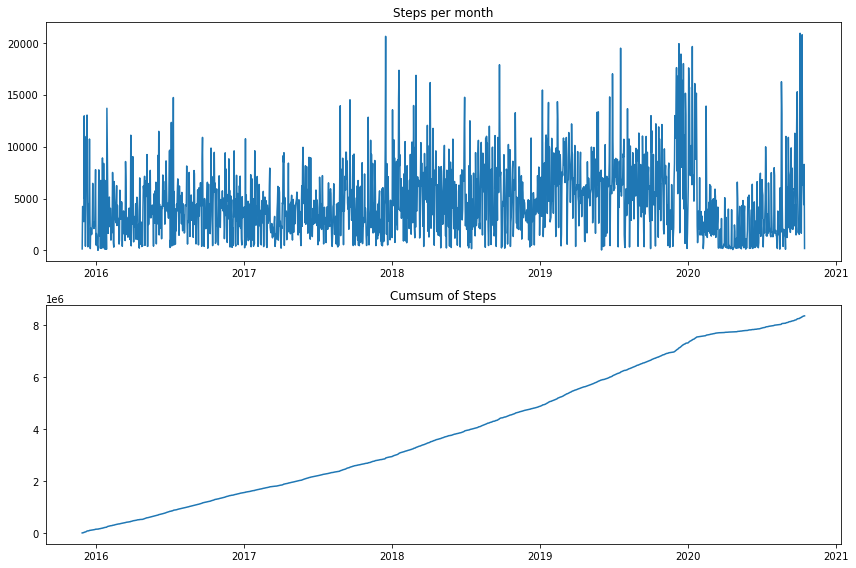

In [51]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(steps_new)
plt.title('Steps per month')

plt.subplot(2,1,2)
plt.plot(cumsum_steps)
plt.title('Cumsum of Steps')
plt.tight_layout()

From the cumulative graph, we can see that Serena's yearly stepcount is increasing linearly

**DataFrame Rolling** or Window Rolling Mean (Moving Average) <br />
The moving average calculation creates an updated average value for each row based on the window we specify. The calculation is also called a “rolling mean” because it's calculating an average of values within a specified range for each row as you go along the DataFrame <br />
<br />
I think this is suitible for us as the data has multiple periods 

Function to observe how the data will appear when it is rolled by the appropriate number of windows to include less fluctuations 

In [52]:
def roll(timeseries_data, window):
    rol_mean = timeseries_data.rolling(window, min_periods = 1).mean()
    rol_std = timeseries_data.rolling(window, min_periods = 1).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries_data,  label = "Original")
    mean = plt.plot(rol_mean,  label = "Rolled Mean")
    std = plt.plot(rol_std,  label = "Rolled Std")
    plt.legend()
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.xlabel("Year")
    plt.ylabel("Step Count")
    plt.show()

### Plotting the roll, changing window sizes

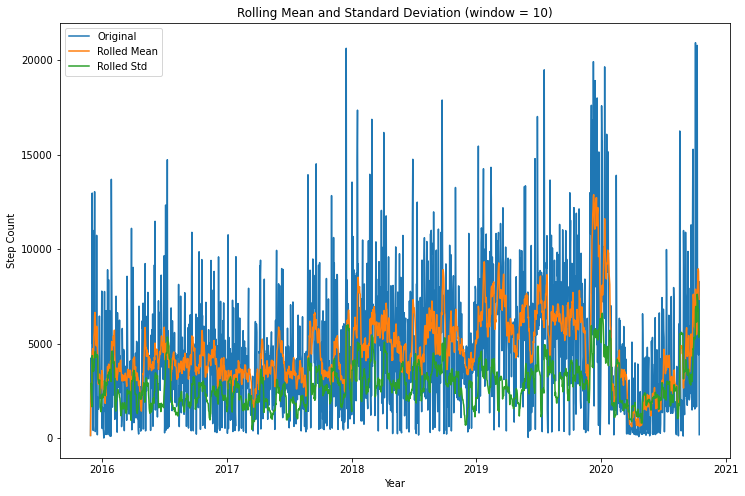

In [53]:
roll(steps_new, 10)

With 10 windows, it appears that the data fluctuates alot less. However, I feel this could be improved so i chose to try it again with 30 windows.

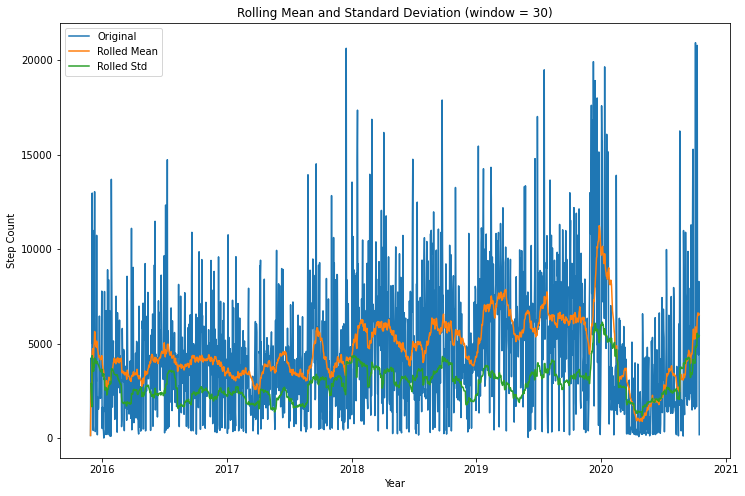

In [54]:
roll(steps_new, 30)

with 30 windows, the fluctuations are much less as such, we may consider using this. But lets see if increasing the number of windows decreases the fluctuations more

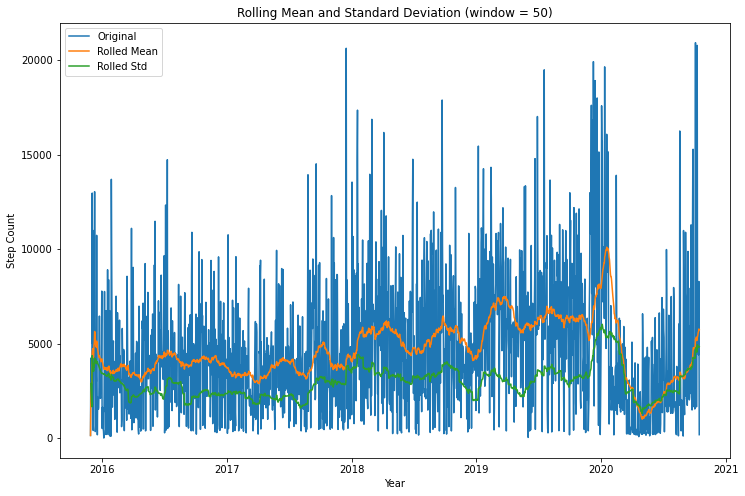

In [55]:
roll(steps_new, 50)

50 windows does not appear to produce any different results than 30 windows.

The **Window** of **30** produces the smoothest prediction so we shall use that

In [56]:
steps_new.rolling(30, min_periods = 1).mean()

,Steps
Start,
2015-11-28,145.000000
2015-11-29,2189.000000
2015-11-30,2846.666667
2015-12-01,2937.250000
2015-12-02,2904.400000
...,...
2020-10-11,6622.800000
2020-10-12,6512.166667
2020-10-13,6588.833333


Quick look at the rolled data with 30 windows

**Creation of a new time series array with some smoothened data by using exponentially weighted moving average**

In [57]:
steps_new = pd.Series(steps_new['Steps'].values,index = 
                      pd.DatetimeIndex(data = 
                                       (tuple(pd.date_range('28/11/2015',periods = 1784,freq = 'D'))),freq = 'D'))

# I used 1784 periods only because i kept getting an error otherwise

In [58]:
steps_new

2015-11-28     145.0
2015-11-29    4233.0
2015-11-30    4162.0
2015-12-01    3209.0
2015-12-02    2773.0
               ...  
2020-10-11    7016.0
2020-10-12    6555.0
2020-10-13    4409.0
2020-10-14    8285.0
2020-10-15     185.0
Freq: D, Length: 1784, dtype: float64

In [59]:
# Test for stationarity - Parameter d
Dickey_Fuller_Test(steps_new)

Dickey-Fuller Test:
Test Statistic                   -4.663475
p-value                           0.000099
#Lags Used                       22.000000
Number of Observations Used    1761.000000
dtype: float64


Again, as $\alpha$ > p-value, we can conclude that the data is stationary.

We will be using this for our ARIMA model prediction

# Consider using ARIMA for model prediction

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

Find out more

An ARIMA model is characterized by 3 terms: p, d, q <br />
<br />
where,<br />
<br />
p is the order of the AR term<br />
q is the order of the MA term<br />
d is the number of differencing required to make the time series stationary<br />
<br />
If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish ARIMA.

As the Stationary requirement of the data is confirmed, we can proceed with using the ARIMA. <br />
as data is aleady stationary, we have **d = 0** <br />
‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. <br />
And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

# Ignore ARIMA for now, im currently doing more research and studying the requirements to implement.

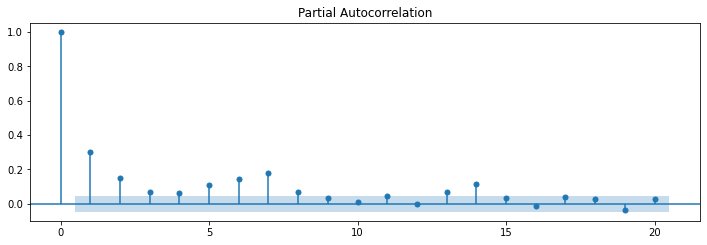

In [66]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(212)
fig = plot_pacf(steps_new, lags=20, ax=ax)

Unfortunately we are unable to select lags that are less than 1 for the model. as such, we will go with **p = 1** <br />
I'm confused on selection of q. But anything other than **q = 0** results in the prediction going negative which is incorrect as it indicates that the series is over differenced

In [67]:
# 1,0,0 ARIMA Model
model = ARIMA(steps_new, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1784
Model:                     ARMA(1, 0)   Log Likelihood              -16971.313
Method:                       css-mle   S.D. of innovations           3275.095
Date:                Wed, 18 Nov 2020   AIC                          33948.625
Time:                        11:13:52   BIC                          33965.085
Sample:                    11-28-2015   HQIC                         33954.704
                         - 10-15-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4676.8010    111.228     42.047      0.000    4458.798    4894.804
ar.L1.y        0.3030      0.023     13.422      0.000       0.259       0.347
                                    Roots           

C:\Users\Martin\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


The model reveals that the ar.L1.y term is highly significant (looking at the P>|Z| < 0.05

C:\Users\Martin\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


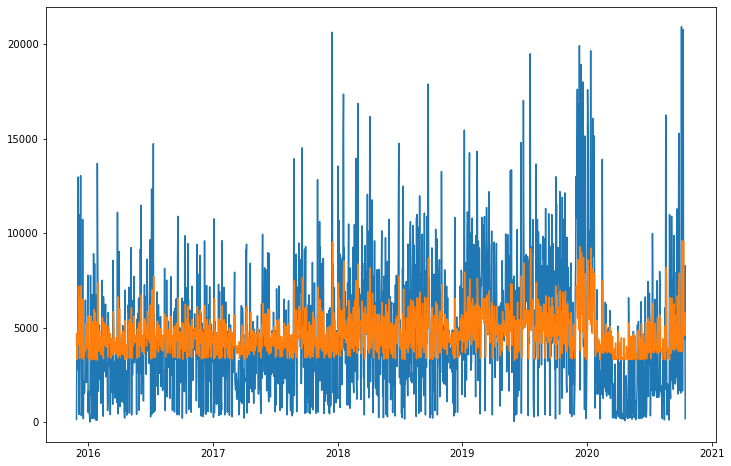

In [68]:
model = ARIMA(steps_new, order=(1, 0, 0))  
results_AR = model.fit()
plt.figure(figsize=(12,8))
plt.plot(steps_new)
plt.plot(results_AR.fittedvalues)

# Checking for normality

In [ ]:
from scipy.stats import norm

plt.figure(figsize = (12, 8))
plt.hist(results_AR.resid, bins = 'auto', density = True, rwidth = 0.85,
         label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 1,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

In [ ]:
model_AR1 = ARIMA(steps_new, order=(1, 0, 0))  
results_AR1 = model_AR1.fit()

In [ ]:
Fcast1 = results_AR1.predict(start = '28/11/2015',
                               end = '15/05/2021')

In [ ]:
model_AR2 = ARIMA(steps_new, order=(2, 0, 0))  
results_AR2 = model_AR1.fit()

In [ ]:
Fcast2 = results_AR2.predict(start = '28/11/2015',
                               end = '15/05/2021')

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(steps_new, linewidth = 2, label = "Original")
plt.plot(Fcast1, color='blue', linewidth = 2,
         label = "Model 1")
plt.plot(Fcast2, color='red', linewidth = 2,
         label = "Model 2")
plt.legend()